# 0.데이터 불러오기

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [7]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
dlq = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_DLQ.csv')             # 연체정보(금융회사, 대부회사)
pub = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_PUB.csv')             # 연체정보(공공기관)

ln = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_LN.csv')               # 개인대출정보(금융권)
ln_sp = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_LN_SP.csv')         # 개인대출정보(대부업권)

cd_opn = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_CD_OPN.csv')       # 카드개설정보
cd_usg = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_CD_USG.csv')       # 카드이용정보

grnt = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_GRNT.csv')           # 채무보증정보

In [10]:
id = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_ID.csv')                   # 차주정보

rlps = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_RLPS.csv')            # 보험계약관계자정보
cont = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_CONT_PVT.csv')        # 보험계약정보
mgg = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_MGG_PVT.csv')          # 보험담보정보

accd = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_ACCD.csv')            # 청구사고정보
claim_cont = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_CONT.csv')      # 청구계약정보
pmnt = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_PMNT.csv')            # 청구지급사유정보
pmntdtl = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_PMNTDTL.csv')      # 청구지급상세사유정보
vctm = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_VCTM.csv')            # 청구피해자물정보

# X

## X-1. 연체정보(금융회사, 대부회사)

In [8]:
display(dlq.head(2))
display(dlq.info())

,YM,JOIN_SN,JOIN_SN_TYP,BIZ_SN,SCTR_CD,COM_SN,IS_ME,DLQ_CD_1,DLQ_CD_2,DLQ_RGST_DT,DLQ_RGST_AMT,DLQ_AMT,RLS_RSN_CD,RLS_DT
0,201912,801488,1,0,24,7457842,0,101,0,201701,3600,1,0,0
1,201807,895503,1,0,1,872260,0,101,7,201101,7400,7400,99,201801


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29001 entries, 0 to 29000
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YM            29001 non-null  int64
 1   JOIN_SN       29001 non-null  int64
 2   JOIN_SN_TYP   29001 non-null  int64
 3   BIZ_SN        29001 non-null  int64
 4   SCTR_CD       29001 non-null  int64
 5   COM_SN        29001 non-null  int64
 6   IS_ME         29001 non-null  int64
 7   DLQ_CD_1      29001 non-null  int64
 8   DLQ_CD_2      29001 non-null  int64
 9   DLQ_RGST_DT   29001 non-null  int64
 10  DLQ_RGST_AMT  29001 non-null  int64
 11  DLQ_AMT       29001 non-null  int64
 12  RLS_RSN_CD    29001 non-null  int64
 13  RLS_DT        29001 non-null  int64
dtypes: int64(14)
memory usage: 3.1 MB


None

In [43]:
dlq_cate = ['JOIN_SN_TYP', 'SCTR_CD', 'IS_ME', 'DLQ_CD_1', 'DLQ_CD_2', 'RLS_RSN_CD', 'JOIN_SN', 'BIZ_SN', 'COM_SN']
dlq[dlq_cate] = dlq[dlq_cate].astype('category')

dlq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29001 entries, 0 to 29000
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   YM            29001 non-null  int64   
 1   JOIN_SN       29001 non-null  category
 2   JOIN_SN_TYP   29001 non-null  category
 3   BIZ_SN        29001 non-null  category
 4   SCTR_CD       29001 non-null  category
 5   COM_SN        29001 non-null  category
 6   IS_ME         29001 non-null  category
 7   DLQ_CD_1      29001 non-null  category
 8   DLQ_CD_2      29001 non-null  category
 9   DLQ_RGST_DT   29001 non-null  int64   
 10  DLQ_RGST_AMT  29001 non-null  int64   
 11  DLQ_AMT       29001 non-null  int64   
 12  RLS_RSN_CD    29001 non-null  category
 13  RLS_DT        29001 non-null  int64   
dtypes: category(9), int64(5)
memory usage: 1.5 MB


In [44]:
dlq.describe()

,YM,DLQ_RGST_DT,DLQ_RGST_AMT,DLQ_AMT,RLS_DT
count,29001.000000,29001.000000,29001.000000,29001.000000,29001.000000
mean,201899.491259,201539.220992,9174.885004,7092.959553,22676.938623
std,69.890067,236.394868,19530.393884,16564.482874,63744.979265
min,201806.000000,201007.000000,0.000000,0.000000,0.000000
25%,201811.000000,201311.000000,820.000000,570.000000,0.000000
50%,201906.000000,201509.000000,2600.000000,1900.000000,0.000000
75%,201912.000000,201710.000000,7900.000000,5900.000000,0.000000
max,202006.000000,202006.000000,100000.000000,100000.000000,202007.000000


In [45]:
dlq.agg(['count', 'size', 'nunique'])

,YM,JOIN_SN,JOIN_SN_TYP,BIZ_SN,SCTR_CD,COM_SN,IS_ME,DLQ_CD_1,DLQ_CD_2,DLQ_RGST_DT,DLQ_RGST_AMT,DLQ_AMT,RLS_RSN_CD,RLS_DT
count,29001,29001,29001,29001,29001,29001,29001,29001,29001,29001,29001,29001,29001,29001
size,29001,29001,29001,29001,29001,29001,29001,29001,29001,29001,29001,29001,29001,29001
nunique,25,901,1,97,10,1495,1,19,2,120,244,238,12,38


In [ ]:
# dlq_group_1 = dlq.groupby('DLQ_CD_1').size().reset_index(name='count')

In [33]:
dlq['DLQ_CD_1'] = dlq['DLQ_CD_1'].astype(str)

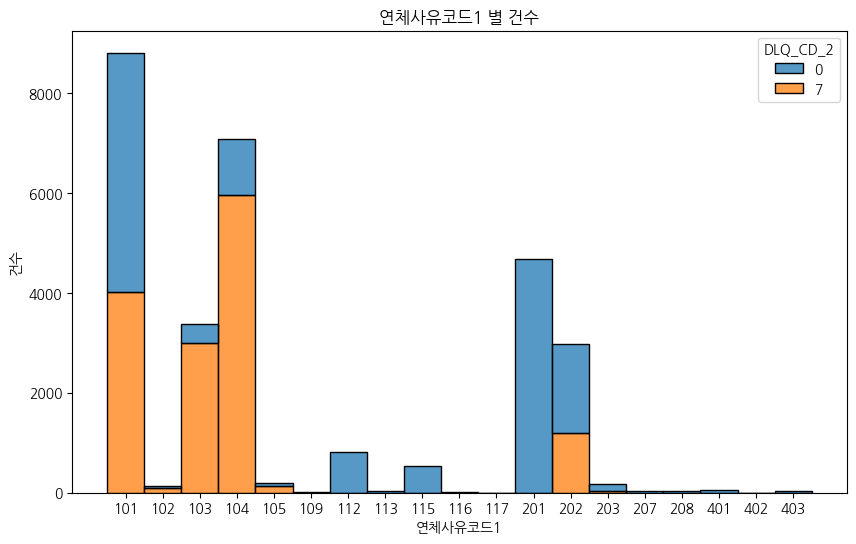

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(x='DLQ_CD_1', hue='DLQ_CD_2', multiple='stack', data=dlq)
plt.xlabel('연체사유코드1')
plt.ylabel('건수')
plt.title('연체사유코드1 별 건수')
plt.show()

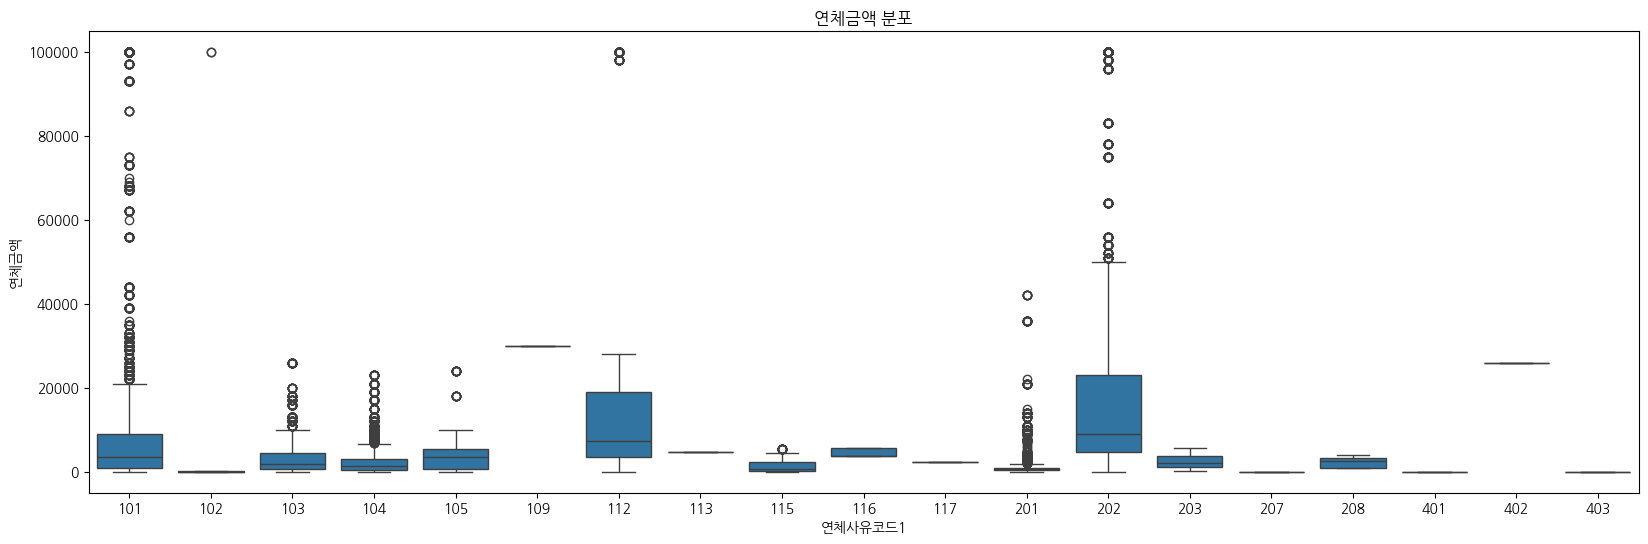

In [42]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='DLQ_CD_1', y='DLQ_AMT', order=sorted(dlq['DLQ_CD_1'].unique()), data=dlq)  # hue='DLQ_CD_2'
plt.xlabel('연체사유코드1')
plt.ylabel('연체금액')
plt.title('연체금액 분포')
plt.show()

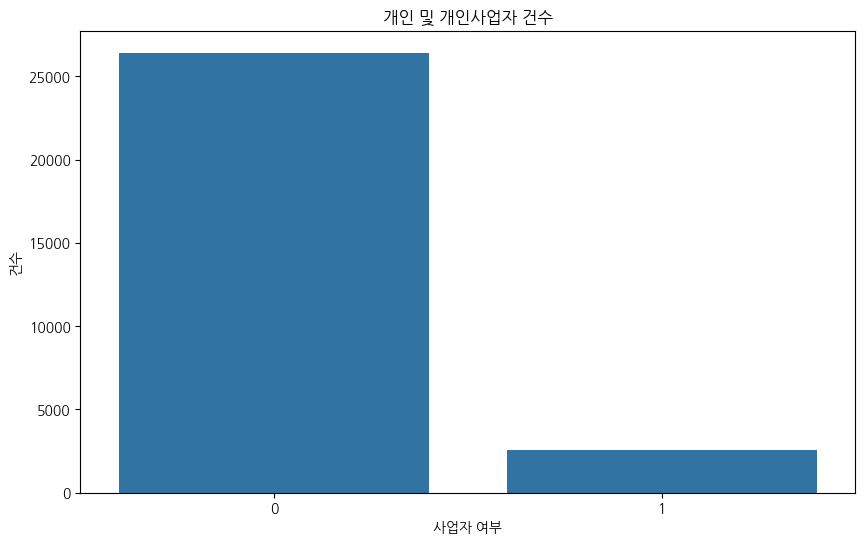

In [52]:
dlq['BIZ_SN_2'] = dlq['BIZ_SN'].apply(lambda x: 0 if x == 0 else 1)

plt.figure(figsize=(10, 6))
sns.countplot(x='BIZ_SN_2', data=dlq)
plt.xlabel('사업자 여부')
plt.ylabel('건수')
plt.title('개인 및 개인사업자 건수')
plt.show()

## X-2. 연체정보(공공기관)

In [53]:
display(pub.head(2))
display(pub.info())

,YM,JOIN_SN,JOIN_SN_TYP,BIZ_SN,SCTR_CD,COM_SN,IS_ME,DLQ_CD_1,DLQ_CD_2,DLQ_RGST_DT,DLQ_RGST_AMT,DLQ_AMT,RLS_RSN_CD,RLS_DT
0,201904,826249,1,0,12,7607565,0,601,0,201412,0,0,0,0
1,201911,259054,1,0,12,2371527,0,1201,0,201508,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25021 entries, 0 to 25020
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YM            25021 non-null  int64
 1   JOIN_SN       25021 non-null  int64
 2   JOIN_SN_TYP   25021 non-null  int64
 3   BIZ_SN        25021 non-null  int64
 4   SCTR_CD       25021 non-null  int64
 5   COM_SN        25021 non-null  int64
 6   IS_ME         25021 non-null  int64
 7   DLQ_CD_1      25021 non-null  int64
 8   DLQ_CD_2      25021 non-null  int64
 9   DLQ_RGST_DT   25021 non-null  int64
 10  DLQ_RGST_AMT  25021 non-null  int64
 11  DLQ_AMT       25021 non-null  int64
 12  RLS_RSN_CD    25021 non-null  int64
 13  RLS_DT        25021 non-null  int64
dtypes: int64(14)
memory usage: 2.7 MB


None

In [54]:
pub_cate = ['JOIN_SN_TYP', 'SCTR_CD', 'IS_ME', 'DLQ_CD_1', 'DLQ_CD_2', 'RLS_RSN_CD', 'JOIN_SN', 'BIZ_SN', 'COM_SN']
pub[pub_cate] = pub[pub_cate].astype('category')

pub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25021 entries, 0 to 25020
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   YM            25021 non-null  int64   
 1   JOIN_SN       25021 non-null  category
 2   JOIN_SN_TYP   25021 non-null  category
 3   BIZ_SN        25021 non-null  category
 4   SCTR_CD       25021 non-null  category
 5   COM_SN        25021 non-null  category
 6   IS_ME         25021 non-null  category
 7   DLQ_CD_1      25021 non-null  category
 8   DLQ_CD_2      25021 non-null  category
 9   DLQ_RGST_DT   25021 non-null  int64   
 10  DLQ_RGST_AMT  25021 non-null  int64   
 11  DLQ_AMT       25021 non-null  int64   
 12  RLS_RSN_CD    25021 non-null  category
 13  RLS_DT        25021 non-null  int64   
dtypes: category(9), int64(5)
memory usage: 1.3 MB


In [55]:
pub.describe()

,YM,DLQ_RGST_DT,DLQ_RGST_AMT,DLQ_AMT,RLS_DT
count,25021.000000,25021.000000,25021.000000,25021.0,25021.0
mean,201899.856001,201563.232085,2617.757084,0.0,0.0
std,69.625593,199.117055,3892.422287,0.0,0.0
min,201806.000000,201107.000000,0.000000,0.0,0.0
25%,201811.000000,201408.000000,0.000000,0.0,0.0
50%,201906.000000,201603.000000,0.000000,0.0,0.0
75%,201912.000000,201707.000000,4800.000000,0.0,0.0
max,202006.000000,202006.000000,10000.000000,0.0,0.0


In [56]:
pub.agg(['count', 'size', 'nunique'])

,YM,JOIN_SN,JOIN_SN_TYP,BIZ_SN,SCTR_CD,COM_SN,IS_ME,DLQ_CD_1,DLQ_CD_2,DLQ_RGST_DT,DLQ_RGST_AMT,DLQ_AMT,RLS_RSN_CD,RLS_DT
count,25021,25021,25021,25021,25021,25021,25021,25021,25021,25021,25021,25021,25021,25021
size,25021,25021,25021,25021,25021,25021,25021,25021,25021,25021,25021,25021,25021,25021
nunique,25,1001,1,13,1,1135,1,14,1,108,84,1,1,1


In [58]:
pub['DLQ_CD_1'] = pub['DLQ_CD_1'].astype(str)

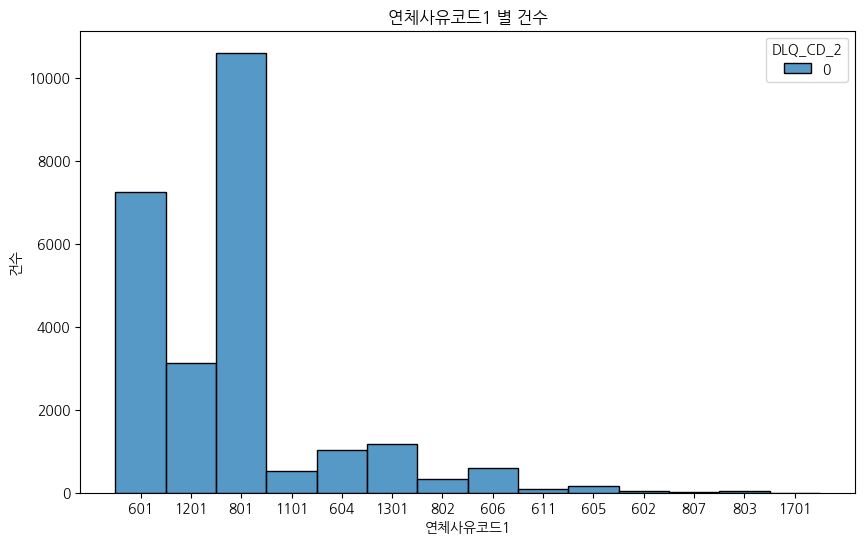

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(x='DLQ_CD_1', hue='DLQ_CD_2', multiple='stack', data=pub)
plt.xlabel('연체사유코드1')
plt.ylabel('건수')
plt.title('연체사유코드1 별 건수')
plt.show()

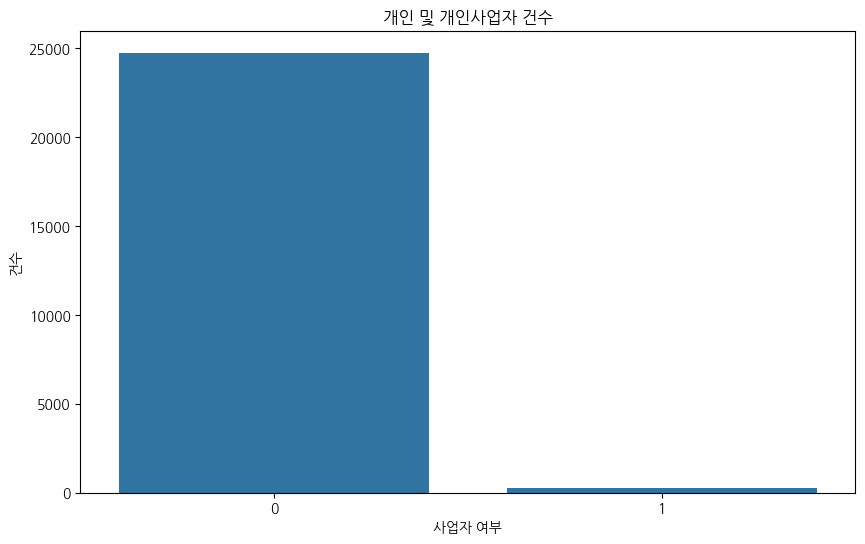

In [61]:
pub['BIZ_SN_2'] = pub['BIZ_SN'].apply(lambda x: 0 if x == 0 else 1)

plt.figure(figsize=(10, 6))
sns.countplot(x='BIZ_SN_2', data=pub)
plt.xlabel('사업자 여부')
plt.ylabel('건수')
plt.title('개인 및 개인사업자 건수')
plt.show()

## X-3. 개인대출정보(금융권)

In [62]:
display(ln.head(2))
display(ln.info())

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
0,201901,310017,1,12,982882,0,31,150,0,201604,720,0,0,0,0,1
1,201912,1368715,1,5,7942190,0,41,0,0,201908,210,1,1,0,18800,210


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753572 entries, 0 to 753571
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   YM           753572 non-null  int64
 1   JOIN_SN      753572 non-null  int64
 2   JOIN_SN_TYP  753572 non-null  int64
 3   SCTR_CD      753572 non-null  int64
 4   COM_SN       753572 non-null  int64
 5   IS_ME        753572 non-null  int64
 6   LN_CD_1      753572 non-null  int64
 7   LN_CD_2      753572 non-null  int64
 8   LN_CD_3      753572 non-null  int64
 9   LN_DT        753572 non-null  int64
 10  LN_AMT       753572 non-null  int64
 11  RATE_YN      753572 non-null  int64
 12  RPY_CD       753572 non-null  int64
 13  EXP_DT       753572 non-null  int64
 14  RATE         753572 non-null  int64
 15  RPY_AMT      753572 non-null  int64
dtypes: int64(16)
memory usage: 92.0 MB


None

In [64]:
ln_cate = ['JOIN_SN_TYP', 'SCTR_CD', 'IS_ME', 'LN_CD_1', 'LN_CD_2', 'LN_CD_3', 'RATE_YN', 'RPY_CD', 'JOIN_SN', 'COM_SN']
ln[ln_cate] = ln[ln_cate].astype('category')

ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753572 entries, 0 to 753571
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   YM           753572 non-null  int64   
 1   JOIN_SN      753572 non-null  category
 2   JOIN_SN_TYP  753572 non-null  category
 3   SCTR_CD      753572 non-null  category
 4   COM_SN       753572 non-null  category
 5   IS_ME        753572 non-null  category
 6   LN_CD_1      753572 non-null  category
 7   LN_CD_2      753572 non-null  category
 8   LN_CD_3      753572 non-null  category
 9   LN_DT        753572 non-null  int64   
 10  LN_AMT       753572 non-null  int64   
 11  RATE_YN      753572 non-null  category
 12  RPY_CD       753572 non-null  category
 13  EXP_DT       753572 non-null  int64   
 14  RATE         753572 non-null  int64   
 15  RPY_AMT      753572 non-null  int64   
dtypes: category(10), int64(6)
memory usage: 45.0 MB


In [67]:
ln.describe()

,YM,LN_DT,LN_AMT,EXP_DT,RATE,RPY_AMT
count,753572.000000,753572.000000,753572.000000,753572.000000,753572.000000,753572.000000
mean,201903.826957,201586.214164,29383.038993,153514.668312,5880.086972,4055.774045
std,69.924106,345.744726,66760.512428,86615.906490,6183.699958,11492.427770
min,201806.000000,199911.000000,100.000000,0.000000,0.000000,0.000000
25%,201812.000000,201411.000000,1500.000000,201810.000000,2200.000000,120.000000
50%,201906.000000,201705.000000,5800.000000,202006.000000,3800.000000,1300.000000
75%,201912.000000,201809.000000,26000.000000,202203.000000,6800.000000,4100.000000
max,202006.000000,202006.000000,1000000.000000,205002.000000,24000.000000,300000.000000


In [66]:
ln.agg(['count', 'size', 'nunique'])

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
count,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572
size,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572,753572
nunique,25,16405,1,11,28805,1,3,20,7,248,353,2,12,380,232,293


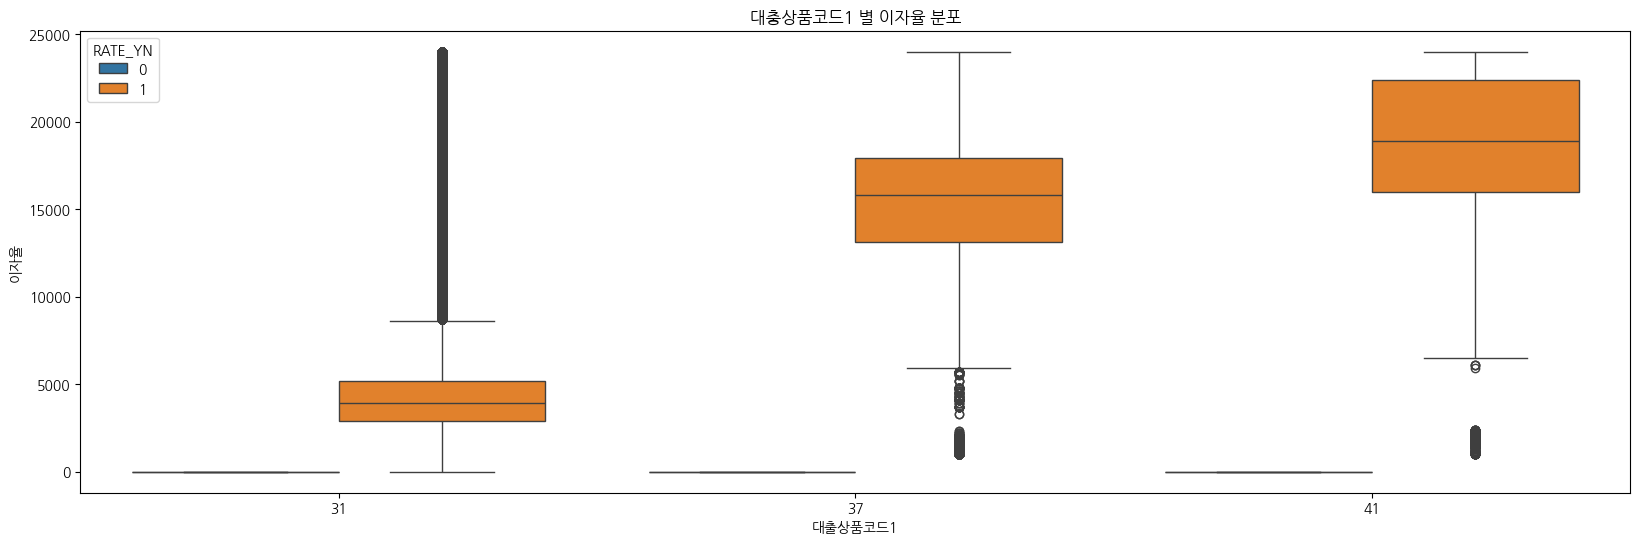

In [71]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='LN_CD_1', y='RATE', hue='RATE_YN', order=sorted(ln['LN_CD_1'].unique()), data=ln)
plt.xlabel('대출상품코드1')
plt.ylabel('이자율')
plt.title('대충상품코드1 별 이자율 분포')
plt.show()

In [88]:
rate_N = ln[ln['RATE_YN'] == 0]

rate_N.nunique()

YM               25
JOIN_SN        4808
JOIN_SN_TYP       1
SCTR_CD          11
COM_SN         6006
IS_ME             1
LN_CD_1           3
LN_CD_2          18
LN_CD_3           4
LN_DT           241
LN_AMT          310
RATE_YN           1
RPY_CD            1
EXP_DT            1
RATE              1
RPY_AMT         188
dtype: int64

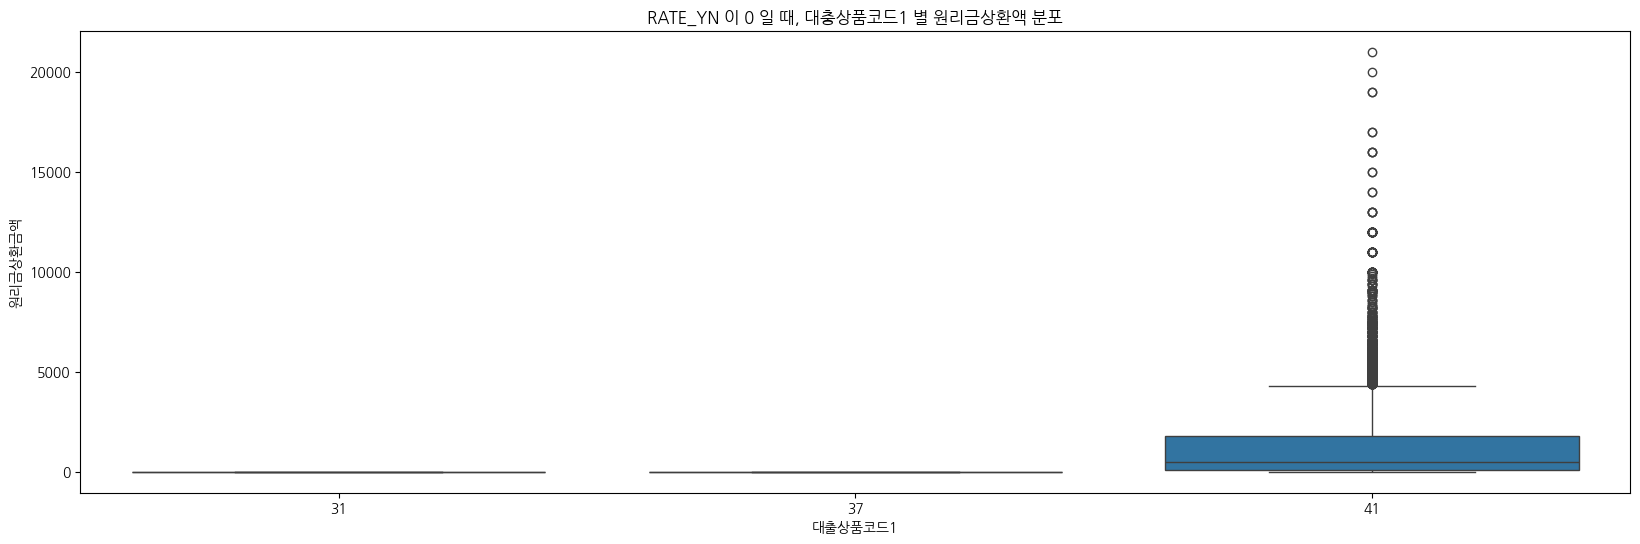

In [90]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='LN_CD_1', y='RPY_AMT', order=sorted(ln['LN_CD_1'].unique()), data=rate_N)
plt.xlabel('대출상품코드1')
plt.ylabel('원리금상환금액')
plt.title('RATE_YN 이 0 일 때, 대충상품코드1 별 원리금상환액 분포')
plt.show()

In [77]:
rate_Y = ln[ln['RATE_YN'] == 1]
ln_group = rate_Y.groupby(['LN_CD_1', 'LN_CD_2', 'LN_CD_3'])['RPY_AMT'].mean().reset_index()
ln_group

,LN_CD_1,LN_CD_2,LN_CD_3,RPY_AMT
0,31,0,0,NaN
1,31,0,100,NaN
2,31,0,170,NaN
3,31,0,180,NaN
4,31,0,200,NaN
...,...,...,...,...
415,41,710,170,NaN
416,41,710,180,NaN
417,41,710,200,NaN
418,41,710,300,NaN


In [79]:
a1 = ln[ln['JOIN_SN'] == 1368715]

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
1,201912,1368715,1,5,7942190,0,41,0,0,201908,210,1,1,0,18800,210
16026,201905,1368715,1,5,7807952,0,41,0,0,201809,350,1,1,0,23500,350
18443,201911,1368715,1,5,6269694,0,41,0,0,201401,100,0,0,0,0,1
20768,202002,1368715,1,5,7807952,0,37,0,0,201903,470,1,4,202009,21500,470
26727,201901,1368715,1,5,6269694,0,37,0,0,201302,650,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724431,202006,1368715,1,5,6269694,0,37,0,0,201309,490,0,0,0,0,1
734904,201807,1368715,1,5,7942190,0,41,0,0,201708,490,0,0,0,0,490
737911,201911,1368715,1,5,7942190,0,37,0,0,201802,200,1,4,202002,16500,200
738782,202003,1368715,1,5,7942190,0,41,0,0,202003,350,1,1,0,18600,350


In [86]:
ln_cd1_31 = ln[ln['LN_CD_1'] == 31]
ln_cd1_37 = ln[ln['LN_CD_1'] == 37]
ln_cd1_41 = ln[ln['LN_CD_1'] == 41]

display(ln_cd1_31.agg(['count', 'size', 'nunique']))
display(ln_cd1_37.agg(['count', 'size', 'nunique']))
display(ln_cd1_41.agg(['count', 'size', 'nunique']))

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
count,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494
size,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494,608494
nunique,25,14749,1,11,22094,1,1,19,7,248,353,2,12,380,232,293


,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
count,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063
size,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063,103063
nunique,25,2514,1,3,3537,1,1,1,1,156,209,2,7,80,211,208


,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
count,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015
size,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015,42015
nunique,25,3655,1,3,5226,1,1,1,1,144,194,2,2,1,188,195


## X-4. 개인대출정보(대부업권)

In [87]:
display(ln_sp.head(2))
display(ln_sp.info())

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
0,201908,1637656,1,24,8563294,0,31,100,0,201712,9300,0,0,0,0,0
1,201809,295724,1,24,2639171,0,31,100,0,201011,20000,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14056 entries, 0 to 14055
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   YM           14056 non-null  int64
 1   JOIN_SN      14056 non-null  int64
 2   JOIN_SN_TYP  14056 non-null  int64
 3   SCTR_CD      14056 non-null  int64
 4   COM_SN       14056 non-null  int64
 5   IS_ME        14056 non-null  int64
 6   LN_CD_1      14056 non-null  int64
 7   LN_CD_2      14056 non-null  int64
 8   LN_CD_3      14056 non-null  int64
 9   LN_DT        14056 non-null  int64
 10  LN_AMT       14056 non-null  int64
 11  RATE_YN      14056 non-null  int64
 12  RPY_CD       14056 non-null  int64
 13  EXP_DT       14056 non-null  int64
 14  RATE         14056 non-null  int64
 15  RPY_AMT      14056 non-null  int64
dtypes: int64(16)
memory usage: 1.7 MB


None

In [91]:
ln_sp_cate = ['JOIN_SN_TYP', 'SCTR_CD', 'IS_ME', 'LN_CD_1', 'LN_CD_2', 'LN_CD_3', 'RATE_YN', 'RPY_CD', 'JOIN_SN', 'COM_SN']
ln_sp[ln_sp_cate] = ln_sp[ln_sp_cate].astype('category')

ln_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14056 entries, 0 to 14055
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   YM           14056 non-null  int64   
 1   JOIN_SN      14056 non-null  category
 2   JOIN_SN_TYP  14056 non-null  category
 3   SCTR_CD      14056 non-null  category
 4   COM_SN       14056 non-null  category
 5   IS_ME        14056 non-null  category
 6   LN_CD_1      14056 non-null  category
 7   LN_CD_2      14056 non-null  category
 8   LN_CD_3      14056 non-null  category
 9   LN_DT        14056 non-null  int64   
 10  LN_AMT       14056 non-null  int64   
 11  RATE_YN      14056 non-null  category
 12  RPY_CD       14056 non-null  category
 13  EXP_DT       14056 non-null  int64   
 14  RATE         14056 non-null  int64   
 15  RPY_AMT      14056 non-null  int64   
dtypes: category(10), int64(6)
memory usage: 867.6 KB


In [92]:
ln_sp.describe()

,YM,LN_DT,LN_AMT,EXP_DT,RATE,RPY_AMT
count,14056.000000,14056.000000,14056.000000,14056.000000,14056.000000,14056.0
mean,201900.256901,201598.534789,4824.935970,63449.714001,8089.214570,0.0
std,69.760583,215.912032,4557.540881,93811.505682,12014.944225,0.0
min,201806.000000,201001.000000,100.000000,0.000000,0.000000,0.0
25%,201812.000000,201507.000000,2000.000000,0.000000,0.000000,0.0
50%,201906.000000,201608.000000,3300.000000,0.000000,0.000000,0.0
75%,201912.000000,201712.000000,6100.000000,202008.000000,24000.000000,0.0
max,202006.000000,202006.000000,20000.000000,202506.000000,30000.000000,0.0


In [93]:
ln_sp.agg(['count', 'size', 'nunique'])

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
count,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056
size,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056,14056
nunique,25,541,1,1,778,1,2,9,1,113,191,2,5,75,9,1


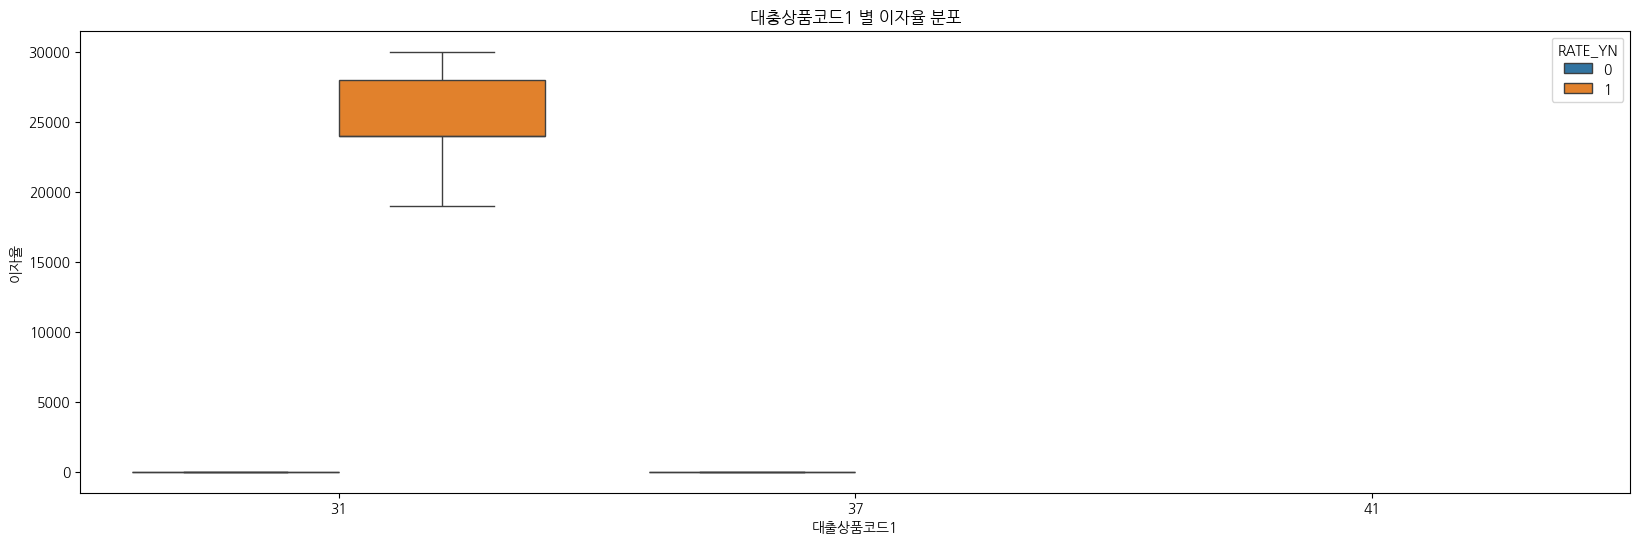

In [94]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='LN_CD_1', y='RATE', hue='RATE_YN', order=sorted(ln['LN_CD_1'].unique()), data=ln_sp)
plt.xlabel('대출상품코드1')
plt.ylabel('이자율')
plt.title('대충상품코드1 별 이자율 분포')
plt.show()

In [95]:
ln_sp_cd1_31 = ln_sp[ln_sp['LN_CD_1'] == 31]
ln_sp_cd1_37 = ln_sp[ln_sp['LN_CD_1'] == 37]
ln_sp_cd1_41 = ln_sp[ln_sp['LN_CD_1'] == 41]

display(ln_sp_cd1_31.agg(['count', 'size', 'nunique']))
display(ln_sp_cd1_37.agg(['count', 'size', 'nunique']))
display(ln_sp_cd1_41.agg(['count', 'size', 'nunique']))

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
count,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031
size,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031,14031
nunique,25,540,1,1,777,1,1,8,1,113,191,2,5,75,9,1


,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
count,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
size,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
nunique,25,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1


,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
size,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nunique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
ln_sp_cd1_37

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,LN_CD_1,LN_CD_2,LN_CD_3,LN_DT,LN_AMT,RATE_YN,RPY_CD,EXP_DT,RATE,RPY_AMT
415,201810,1930541,1,24,3218652,0,37,0,0,201208,5000,0,0,0,0,0
971,202002,1930541,1,24,3218652,0,37,0,0,201208,3700,0,0,0,0,0
1113,201806,1930541,1,24,3218652,0,37,0,0,201208,5000,0,0,0,0,0
1393,201812,1930541,1,24,3218652,0,37,0,0,201208,5000,0,0,0,0,0
3352,201904,1930541,1,24,3218652,0,37,0,0,201208,5000,0,0,0,0,0
3631,201912,1930541,1,24,3218652,0,37,0,0,201208,3700,0,0,0,0,0
3898,201811,1930541,1,24,3218652,0,37,0,0,201208,5000,0,0,0,0,0
4248,201910,1930541,1,24,3218652,0,37,0,0,201208,3700,0,0,0,0,0
5146,202004,1930541,1,24,3218652,0,37,0,0,201208,3700,0,0,0,0,0
7023,201808,1930541,1,24,3218652,0,37,0,0,201208,5000,0,0,0,0,0


## X-5. 신용카드개설정보

In [97]:
display(cd_opn.head(2))
display(cd_opn.info())

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,CD_OPN_CD_1,CD_OPN_CD_2,CD_OPN_DT
0,201806,575401,1,5,2030823,0,81,1,200208
1,202003,644637,1,5,1234259,0,81,2,201906


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310496 entries, 0 to 1310495
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   YM           1310496 non-null  int64
 1   JOIN_SN      1310496 non-null  int64
 2   JOIN_SN_TYP  1310496 non-null  int64
 3   SCTR_CD      1310496 non-null  int64
 4   COM_SN       1310496 non-null  int64
 5   IS_ME        1310496 non-null  int64
 6   CD_OPN_CD_1  1310496 non-null  int64
 7   CD_OPN_CD_2  1310496 non-null  int64
 8   CD_OPN_DT    1310496 non-null  int64
dtypes: int64(9)
memory usage: 90.0 MB


None

In [98]:
cd_opn_cate = ['JOIN_SN', 'JOIN_SN_TYP', 'SCTR_CD', 'COM_SN', 'IS_ME', 'CD_OPN_CD_1', 'CD_OPN_CD_2']
cd_opn[cd_opn_cate] = cd_opn[cd_opn_cate].astype('category')

cd_opn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310496 entries, 0 to 1310495
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   YM           1310496 non-null  int64   
 1   JOIN_SN      1310496 non-null  category
 2   JOIN_SN_TYP  1310496 non-null  category
 3   SCTR_CD      1310496 non-null  category
 4   COM_SN       1310496 non-null  category
 5   IS_ME        1310496 non-null  category
 6   CD_OPN_CD_1  1310496 non-null  category
 7   CD_OPN_CD_2  1310496 non-null  category
 8   CD_OPN_DT    1310496 non-null  int64   
dtypes: category(7), int64(2)
memory usage: 37.5 MB


In [100]:
cd_opn.agg(['count', 'size', 'nunique'])

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,CD_OPN_CD_1,CD_OPN_CD_2,CD_OPN_DT
count,1310496,1310496,1310496,1310496,1310496,1310496,1310496,1310496,1310496
size,1310496,1310496,1310496,1310496,1310496,1310496,1310496,1310496,1310496
nunique,25,25771,1,3,63582,1,2,2,248


In [101]:
cd_opn_1 = cd_opn[cd_opn['CD_OPN_CD_2'] == 1]

In [ ]:
cd_opn_1['CD_OPN_CD_1'] = cd_opn_1['CD_OPN_CD_1'].astype(str)

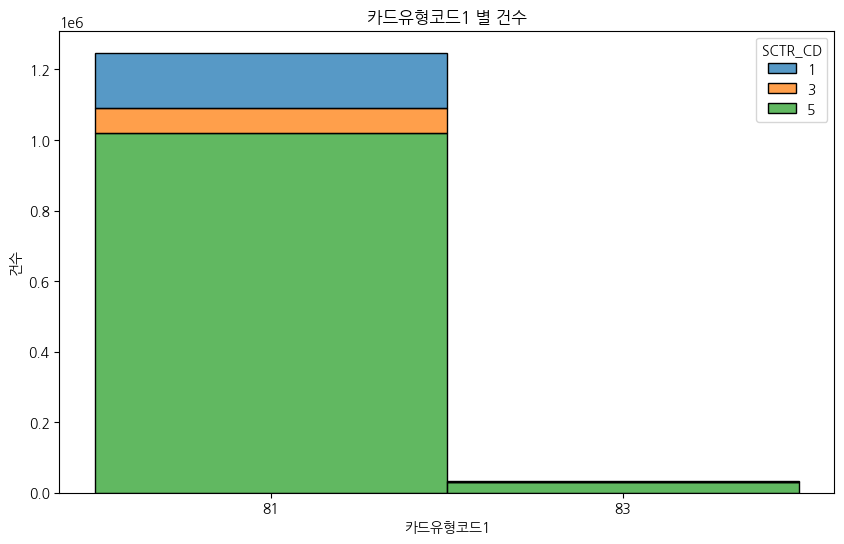

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(x='CD_OPN_CD_1', hue='SCTR_CD', multiple='stack', data=cd_opn_1)
plt.xlabel('카드유형코드1')
plt.ylabel('건수')
plt.title('카드유형코드1 별 건수')
plt.show()

## X-6. 신용카드이용정보

In [104]:
display(cd_usg.head(2))
display(cd_usg.info())

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,CD_USG_LMT,CD_CA_LMT,CD_USG_AMT,CD_CA_AMT
0,201911,1587355,1,5,208980,0,17000,6700,1800,0
1,201904,1221909,1,5,9016470,0,13000,3900,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044889 entries, 0 to 1044888
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   YM           1044889 non-null  int64
 1   JOIN_SN      1044889 non-null  int64
 2   JOIN_SN_TYP  1044889 non-null  int64
 3   SCTR_CD      1044889 non-null  int64
 4   COM_SN       1044889 non-null  int64
 5   IS_ME        1044889 non-null  int64
 6   CD_USG_LMT   1044889 non-null  int64
 7   CD_CA_LMT    1044889 non-null  int64
 8   CD_USG_AMT   1044889 non-null  int64
 9   CD_CA_AMT    1044889 non-null  int64
dtypes: int64(10)
memory usage: 79.7 MB


None

In [105]:
cd_usg_cate = ['JOIN_SN', 'JOIN_SN_TYP', 'SCTR_CD', 'COM_SN', 'IS_ME']
cd_usg[cd_usg_cate] = cd_usg[cd_usg_cate].astype('category')

cd_usg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044889 entries, 0 to 1044888
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   YM           1044889 non-null  int64   
 1   JOIN_SN      1044889 non-null  category
 2   JOIN_SN_TYP  1044889 non-null  category
 3   SCTR_CD      1044889 non-null  category
 4   COM_SN       1044889 non-null  category
 5   IS_ME        1044889 non-null  category
 6   CD_USG_LMT   1044889 non-null  int64   
 7   CD_CA_LMT    1044889 non-null  int64   
 8   CD_USG_AMT   1044889 non-null  int64   
 9   CD_CA_AMT    1044889 non-null  int64   
dtypes: category(5), int64(5)
memory usage: 51.9 MB


In [106]:
cd_usg.describe()

,YM,CD_USG_LMT,CD_CA_LMT,CD_USG_AMT,CD_CA_AMT
count,1.044889e+06,1.044889e+06,1.044889e+06,1.044889e+06,1.044889e+06
mean,2.019051e+05,1.692145e+04,6.132860e+03,5.252855e+02,4.010473e+01
std,7.000810e+01,9.138404e+03,4.754794e+03,9.805307e+02,3.665374e+02
min,2.018060e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.018120e+05,9.100000e+03,2.700000e+03,0.000000e+00,0.000000e+00
50%,2.019060e+05,1.600000e+04,5.000000e+03,1.600000e+02,0.000000e+00
75%,2.020010e+05,2.600000e+04,8.300000e+03,6.300000e+02,0.000000e+00
max,2.020060e+05,3.000000e+04,3.000000e+04,1.000000e+04,1.000000e+04


In [107]:
cd_usg.agg(['count', 'size', 'nunique'])

,YM,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,CD_USG_LMT,CD_CA_LMT,CD_USG_AMT,CD_CA_AMT
count,1044889,1044889,1044889,1044889,1044889,1044889,1044889,1044889,1044889,1044889
size,1044889,1044889,1044889,1044889,1044889,1044889,1044889,1044889,1044889,1044889
nunique,25,17357,1,2,54225,1,112,112,182,180


# 1.데이터 확인

## 1-1. 차주정보

In [11]:
display(id.head(2))
display(id.info())

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
0,787068,1,1984,2,1
1,1630591,1,2010,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49134 entries, 0 to 49133
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   JOIN_SN      49134 non-null  int64
 1   JOIN_SN_TYP  49134 non-null  int64
 2   BTH_YR       49134 non-null  int64
 3   GENDER       49134 non-null  int64
 4   IS_KRN       49134 non-null  int64
dtypes: int64(5)
memory usage: 1.9 MB


None

In [14]:
id_cate = ['JOIN_SN', 'JOIN_SN_TYP', 'GENDER', 'IS_KRN']
id[id_cate] = id[id_cate].astype('category')

display(id.describe())

display(id.agg(['count', 'size', 'nunique']))

,BTH_YR
count,49134.000000
mean,1944.108357
std,258.690600
min,0.000000
25%,1960.000000
50%,1978.000000
75%,1997.000000
max,2010.000000


,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
count,49134,49134,49134,49134,49134
size,49134,49134,49134,49134,49134
nunique,49133,2,77,3,2


* JOIN_SN에 중복 1건

In [22]:
id[id.duplicated(subset=['JOIN_SN'], keep=False)]

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
21376,248157,1,2008,2,1
44659,248157,3,0,0,0


## 1-2. 보험계약관계자정보

In [23]:
display(rlps.head(2))
display(rlps.info())

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
0,1486482,1,6,7623841,0,1771111,C,99,1,34
1,15110,1,8,6937331,0,2197182,C,1,1,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379028 entries, 0 to 379027
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   JOIN_SN         379028 non-null  int64 
 1   JOIN_SN_TYP     379028 non-null  int64 
 2   SCTR_CD         379028 non-null  int64 
 3   COM_SN          379028 non-null  int64 
 4   IS_ME           379028 non-null  int64 
 5   POL_SN          379028 non-null  int64 
 6   CT_RLPS_GBN_CD  379028 non-null  object
 7   CT_IN_RLTN_CD   379028 non-null  int64 
 8   IS_INDIV        379028 non-null  int64 
 9   GIS_CD          379028 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 28.9+ MB


None

In [15]:
rlps.columns

Index(['JOIN_SN', 'JOIN_SN_TYP', 'SCTR_CD', 'COM_SN', 'IS_ME', 'POL_SN',
       'CT_RLPS_GBN_CD', 'CT_IN_RLTN_CD', 'IS_INDIV', 'GIS_CD'],
      dtype='object')

In [24]:
rlps_cate = ['JOIN_SN', 'JOIN_SN_TYP', 'SCTR_CD', 'COM_SN', 'IS_ME', 'POL_SN', 'CT_RLPS_GBN_CD', 'CT_IN_RLTN_CD', 'IS_INDIV', 'GIS_CD']
rlps[rlps_cate] = rlps[rlps_cate].astype('category')

display(rlps.describe())

display(rlps.agg(['count', 'size', 'nunique']))

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
count,379028,379028,379028,379028,379028,379028,379028,379028,379028,379028
unique,46050,1,3,148434,1,248753,2,6,2,17
top,30415,1,6,4141313,0,750334,I,1,1,99
freq,60,379028,215888,57,379028,162,229101,247674,378021,97124


,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
count,379028,379028,379028,379028,379028,379028,379028,379028,379028,379028
size,379028,379028,379028,379028,379028,379028,379028,379028,379028,379028
nunique,46050,1,3,148434,1,248753,2,6,2,17


* CT_RLPS_GBN_CD(계약자/피보험자 구분 코드)에 피보험자(I)인 경우가 많음 (248753 증권 계약 건 중 229101 건이 피보험자)
* 단, 계약자(C)인 건 중에서 CT_IN_RLTN_CD(계-피 관계코드)가 1인 경우는 본인이 피보험자이니 피보험자로 분류해도 괜찮음
* 계-피보험자 관계코드나 거주지역코드 사용 가능 할 지? 어떻게 사용 할 지? 생각 필요

## 1-3. 보험계약정보

In [25]:
display(cont.head(2))
display(cont.info())

,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,6,3023157,0,3,7,200806,200903,200806,200906,999912,999912,10,2,1,0,1,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,8,2067576,0,1,2,201012,999912,201012,999912,999912,999912,33,2,20,0,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368483 entries, 0 to 368482
Data columns (total 42 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   SCTR_CD         368483 non-null  int64
 1   POL_SN          368483 non-null  int64
 2   IS_GRP_INS      368483 non-null  int64
 3   INS_GBN_CD      368483 non-null  int64
 4   INS_CT_STAT_CD  368483 non-null  int64
 5   CT_CNCLS_DT     368483 non-null  int64
 6   CT_TRMNT_DT     368483 non-null  int64
 7   CT_ST_DT        368483 non-null  int64
 8   CT_END_DT       368483 non-null  int64
 9   CT_EFCTV_DT     368483 non-null  int64
 10  CT_RST_DT       368483 non-null  int64
 11  CT_PY_AMT       368483 non-null  int64
 12  CT_PY_CYCLE_CD  368483 non-null  int64
 13  CT_PY_PD        368483 non-null  int64
 14  IS_CT_DIGNS     368483 non-null  int64
 15  CT_JDGMT_CD     368483 non-null  int64
 16  CT_CHNL_CD      368483 non-null  int64
 17  YM_201806       368483 non-null  int64
 18  YM_2

None

In [26]:
cont.columns

Index(['SCTR_CD', 'POL_SN', 'IS_GRP_INS', 'INS_GBN_CD', 'INS_CT_STAT_CD',
       'CT_CNCLS_DT', 'CT_TRMNT_DT', 'CT_ST_DT', 'CT_END_DT', 'CT_EFCTV_DT',
       'CT_RST_DT', 'CT_PY_AMT', 'CT_PY_CYCLE_CD', 'CT_PY_PD', 'IS_CT_DIGNS',
       'CT_JDGMT_CD', 'CT_CHNL_CD', 'YM_201806', 'YM_201807', 'YM_201808',
       'YM_201809', 'YM_201810', 'YM_201811', 'YM_201812', 'YM_201901',
       'YM_201902', 'YM_201903', 'YM_201904', 'YM_201905', 'YM_201906',
       'YM_201907', 'YM_201908', 'YM_201909', 'YM_201910', 'YM_201911',
       'YM_201912', 'YM_202001', 'YM_202002', 'YM_202003', 'YM_202004',
       'YM_202005', 'YM_202006'],
      dtype='object')

In [27]:
cont_cate = ['SCTR_CD', 'POL_SN', 'IS_GRP_INS', 'INS_GBN_CD', 'INS_CT_STAT_CD',
       'CT_PY_CYCLE_CD', 'IS_CT_DIGNS',
       'CT_JDGMT_CD', 'CT_CHNL_CD', 'YM_201806', 'YM_201807', 'YM_201808',
       'YM_201809', 'YM_201810', 'YM_201811', 'YM_201812', 'YM_201901',
       'YM_201902', 'YM_201903', 'YM_201904', 'YM_201905', 'YM_201906',
       'YM_201907', 'YM_201908', 'YM_201909', 'YM_201910', 'YM_201911',
       'YM_201912', 'YM_202001', 'YM_202002', 'YM_202003', 'YM_202004',
       'YM_202005', 'YM_202006']
cont[cont_cate] = cont[cont_cate].astype('category')

display(cont.describe())

display(cont.agg(['count', 'size', 'nunique']))

,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_PD
count,368483.000000,368483.000000,368483.000000,368483.000000,368483.000000,368483.000000,3.684830e+05,368483.000000
mean,201374.557407,824804.500148,201377.484584,367966.221088,955179.938477,979490.807391,4.352733e+02,13.975546
std,382.918717,330363.003241,383.483364,322382.183376,183602.393510,126037.479117,8.537547e+03,15.155396
min,200612.000000,199911.000000,200612.000000,200612.000000,199911.000000,200610.000000,1.000000e+00,0.000000
25%,201101.000000,999912.000000,201101.000000,201812.000000,999912.000000,999912.000000,2.800000e+01,1.000000
50%,201405.000000,999912.000000,201406.000000,203404.000000,999912.000000,999912.000000,5.900000e+01,10.000000
75%,201706.000000,999912.000000,201707.000000,208811.000000,999912.000000,999912.000000,1.200000e+02,20.000000
max,202006.000000,999912.000000,202006.000000,999912.000000,999912.000000,999912.000000,1.200000e+06,99.000000


,SCTR_CD,POL_SN,IS_GRP_INS,INS_GBN_CD,INS_CT_STAT_CD,CT_CNCLS_DT,CT_TRMNT_DT,CT_ST_DT,CT_END_DT,CT_EFCTV_DT,CT_RST_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,IS_CT_DIGNS,CT_JDGMT_CD,CT_CHNL_CD,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
count,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483
size,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483,368483
nunique,3,244232,2,18,10,163,181,163,1120,174,166,233,4,100,2,8,8,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


* IS_GRP_INS(단체보험여부) : 단체보험인 경우는 개인 의지로 가입한 상품이 아니니 제외?
  * 이미 단체보험이 있으니 개인 보험이 필요 없어서 가입하지 않는 경우
  * 단체보험이 있어도 보험에 대한 무지 혹은 필요성으로 추가로 개인이 보험 가입하는 경우
  
  ... 등 이 있을 수도?

* 주 계약상태코드 / 보험계약체결월, 보험계약해지월 / 기준년월 등 으로 계약유지율 비슷한 내용 뽑을 수 있을지? (뽑는다면 보험종류 별이 좋지 않을까)
* 납입보험료로 고객이 보험에 지출한 총액(보험종류 별? 보험 전체?)
* 가입경로코드 피쳐에 넣어야?

## 1-4. 보험담보정보

In [32]:
display(mgg.head(2))
display(mgg.info())

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
0,499723,1,6,3260523,A5,A5301,1,480,480,480,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,998541,1,6,1272317,A4,A4303,1,400,400,400,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408807 entries, 0 to 1408806
Data columns (total 35 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   JOIN_SN      1408807 non-null  int64 
 1   JOIN_SN_TYP  1408807 non-null  int64 
 2   SCTR_CD      1408807 non-null  int64 
 3   POL_SN       1408807 non-null  int64 
 4   MGG_GRP_CD   1408807 non-null  object
 5   MGG_CD       1408807 non-null  object
 6   MGG_CNT      1408807 non-null  int64 
 7   MGG_AMT_SUM  1408807 non-null  int64 
 8   MGG_AMT_MAX  1408807 non-null  int64 
 9   MGG_AMT_MIN  1408807 non-null  int64 
 10  YM_201806    1408807 non-null  int64 
 11  YM_201807    1408807 non-null  int64 
 12  YM_201808    1408807 non-null  int64 
 13  YM_201809    1408807 non-null  int64 
 14  YM_201810    1408807 non-null  int64 
 15  YM_201811    1408807 non-null  int64 
 16  YM_201812    1408807 non-null  int64 
 17  YM_201901    1408807 non-null  int64 
 18  YM_201902    1408807 n

None

In [33]:
mgg.columns

Index(['JOIN_SN', 'JOIN_SN_TYP', 'SCTR_CD', 'POL_SN', 'MGG_GRP_CD', 'MGG_CD',
       'MGG_CNT', 'MGG_AMT_SUM', 'MGG_AMT_MAX', 'MGG_AMT_MIN', 'YM_201806',
       'YM_201807', 'YM_201808', 'YM_201809', 'YM_201810', 'YM_201811',
       'YM_201812', 'YM_201901', 'YM_201902', 'YM_201903', 'YM_201904',
       'YM_201905', 'YM_201906', 'YM_201907', 'YM_201908', 'YM_201909',
       'YM_201910', 'YM_201911', 'YM_201912', 'YM_202001', 'YM_202002',
       'YM_202003', 'YM_202004', 'YM_202005', 'YM_202006'],
      dtype='object')

In [34]:
mgg_cate = ['JOIN_SN', 'JOIN_SN_TYP', 'SCTR_CD', 'POL_SN', 'MGG_GRP_CD', 'MGG_CD', 'YM_201806',
       'YM_201807', 'YM_201808', 'YM_201809', 'YM_201810', 'YM_201811',
       'YM_201812', 'YM_201901', 'YM_201902', 'YM_201903', 'YM_201904',
       'YM_201905', 'YM_201906', 'YM_201907', 'YM_201908', 'YM_201909',
       'YM_201910', 'YM_201911', 'YM_201912', 'YM_202001', 'YM_202002',
       'YM_202003', 'YM_202004', 'YM_202005', 'YM_202006']
mgg[mgg_cate] = mgg[mgg_cate].astype('category')

display(mgg.describe())

display(mgg.agg(['count', 'size', 'nunique']))

,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN
count,1.408807e+06,1.408807e+06,1.408807e+06,1.408807e+06
mean,1.320381e+00,1.495291e+04,1.335901e+04,1.187163e+04
std,1.299050e+00,3.154855e+04,2.868541e+04,2.731272e+04
min,1.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02
25%,1.000000e+00,2.600000e+02,2.400000e+02,2.100000e+02
50%,1.000000e+00,5.400000e+03,4.500000e+03,2.600000e+03
75%,1.000000e+00,1.300000e+04,1.200000e+04,1.000000e+04
max,3.400000e+01,5.000000e+05,5.000000e+05,5.000000e+05


,JOIN_SN,JOIN_SN_TYP,SCTR_CD,POL_SN,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,MGG_AMT_MAX,MGG_AMT_MIN,YM_201806,YM_201807,YM_201808,YM_201809,YM_201810,YM_201811,YM_201812,YM_201901,YM_201902,YM_201903,YM_201904,YM_201905,YM_201906,YM_201907,YM_201908,YM_201909,YM_201910,YM_201911,YM_201912,YM_202001,YM_202002,YM_202003,YM_202004,YM_202005,YM_202006
count,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807
size,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807,1408807
nunique,50143,1,3,115467,13,140,31,311,310,311,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


* 이 데이터 어떻게 씀?
* 군집별 선호하는 담보?
* 담보별 손해율 계산 불가
* 보험사에서 다 짜놓은 담보 중에서 필수로 들어가는 담보는 당연히 빈도가 높을 수 밖에 없지 않나?

## 1-5. 청구사고정보

In [35]:
display(accd.head(2))
display(accd.info())

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
0,514694,1,8,5561038,0,2292889,839524,1,99,201905,201905,99,0
1,1666172,1,8,1604841,0,598965,1898453,1,36,201902,201905,99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41347 entries, 0 to 41346
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   JOIN_SN         41347 non-null  int64
 1   JOIN_SN_TYP     41347 non-null  int64
 2   SCTR_CD         41347 non-null  int64
 3   COM_SN          41347 non-null  int64
 4   IS_ME           41347 non-null  int64
 5   ACCD_SN         41347 non-null  int64
 6   REQ_SN          41347 non-null  int64
 7   IS_INDIV        41347 non-null  int64
 8   GIS_CD          41347 non-null  int64
 9   ACCD_DT         41347 non-null  int64
 10  FST_RPT_DT      41347 non-null  int64
 11  ACCD_GIS_CD     41347 non-null  int64
 12  IN_DRV_RLTN_CD  41347 non-null  int64
dtypes: int64(13)
memory usage: 4.1 MB


None

In [36]:
accd.columns

Index(['JOIN_SN', 'JOIN_SN_TYP', 'SCTR_CD', 'COM_SN', 'IS_ME', 'ACCD_SN',
       'REQ_SN', 'IS_INDIV', 'GIS_CD', 'ACCD_DT', 'FST_RPT_DT', 'ACCD_GIS_CD',
       'IN_DRV_RLTN_CD'],
      dtype='object')

In [37]:
accd_cate = ['JOIN_SN', 'JOIN_SN_TYP', 'SCTR_CD', 'COM_SN', 'IS_ME', 'ACCD_SN',
       'REQ_SN', 'IS_INDIV', 'GIS_CD', 'ACCD_GIS_CD', 'IN_DRV_RLTN_CD']
accd[accd_cate] = accd[accd_cate].astype('category')

display(accd.describe())

display(accd.agg(['count', 'size', 'nunique']))

,ACCD_DT,FST_RPT_DT
count,41347.000000,41347.000000
mean,201894.560089,201913.396159
std,65.656164,66.722906
min,201806.000000,201806.000000
25%,201812.000000,201902.000000
50%,201905.000000,201908.000000
75%,201911.000000,202001.000000
max,202006.000000,202006.000000


,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
count,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
size,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
nunique,17591,1,3,22189,1,39650,33603,1,17,25,25,17,6


* 거주지역 코드는 보험계약관계자정보에도 있음.
* 사고지역 코드 쓸 필요가 있을까
* 차량 사고에만 관한 데이터인지 확인 필요
  * 청구계약정보 기준, 자동차보험이 아니면서 청구사고정보에 있는 데이터 존재함
  
  => 차량 사고에만 관한 데이터 아님

* 사고번호로만 조회 했을 때, 같은 번호로 중복된 데이터 중 차주번호, 청구번호가 다른 경우 확인

  => 청구사고정보, 청구계약번호 결합 시, 사고번호와 청구번호가 일치하는 것으로 데이터 결합해야 함

## 1-6. 청구계약정보

In [38]:
display(claim_cont.head(2))
display(claim_cont.info())

,SCTR_CD,ACCD_SN,REQ_SN,POL_SN,IS_GRP_INS,INS_GBN_CD,CT_CNCLS_DT,CT_ST_DT,CT_END_DT,CT_IN_RLTN_CD,CT_CHNL_CD
0,6,1140150,650855,5957565,0,4,201601,201601,207501,99,99
1,6,1935093,1630531,5097060,0,3,201107,201107,208007,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46299 entries, 0 to 46298
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SCTR_CD        46299 non-null  int64
 1   ACCD_SN        46299 non-null  int64
 2   REQ_SN         46299 non-null  int64
 3   POL_SN         46299 non-null  int64
 4   IS_GRP_INS     46299 non-null  int64
 5   INS_GBN_CD     46299 non-null  int64
 6   CT_CNCLS_DT    46299 non-null  int64
 7   CT_ST_DT       46299 non-null  int64
 8   CT_END_DT      46299 non-null  int64
 9   CT_IN_RLTN_CD  46299 non-null  int64
 10  CT_CHNL_CD     46299 non-null  int64
dtypes: int64(11)
memory usage: 3.9 MB


None

In [39]:
claim_cont.columns

Index(['SCTR_CD', 'ACCD_SN', 'REQ_SN', 'POL_SN', 'IS_GRP_INS', 'INS_GBN_CD',
       'CT_CNCLS_DT', 'CT_ST_DT', 'CT_END_DT', 'CT_IN_RLTN_CD', 'CT_CHNL_CD'],
      dtype='object')

In [40]:
claim_cont_cate = ['SCTR_CD', 'ACCD_SN', 'REQ_SN', 'POL_SN', 'IS_GRP_INS', 'INS_GBN_CD', 'CT_IN_RLTN_CD', 'CT_CHNL_CD']
claim_cont[claim_cont_cate] = claim_cont[claim_cont_cate].astype('category')

display(claim_cont.describe())

display(claim_cont.agg(['count', 'size', 'nunique']))

,CT_CNCLS_DT,CT_ST_DT,CT_END_DT
count,46299.000000,46299.000000,46299.000000
mean,201320.236873,201320.941791,379891.560638
std,466.796419,467.399438,329693.075278
min,199911.000000,199911.000000,201803.000000
25%,201002.000000,201002.000000,202505.000000
50%,201401.000000,201401.000000,205602.000000
75%,201801.000000,201801.000000,209402.000000
max,202009.000000,202009.000000,999912.000000


,SCTR_CD,ACCD_SN,REQ_SN,POL_SN,IS_GRP_INS,INS_GBN_CD,CT_CNCLS_DT,CT_ST_DT,CT_END_DT,CT_IN_RLTN_CD,CT_CHNL_CD
count,46299,46299,46299,46299,46299,46299,46299,46299,46299,46299,46299
size,46299,46299,46299,46299,46299,46299,46299,46299,46299,46299,46299
nunique,3,39616,33570,26331,2,19,251,251,983,6,8


* 사고 발생월에 관한 데이터가 없어서 보험계약 체결 시점부터 사고발생까지 걸린 시간 계산 불가
* 어떤 정보가 쓸만한지 눈에 확 와닿는건 없음


## 1-7. 청구지급사유정보

In [41]:
display(pmnt.head(2))
display(pmnt.info())

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
0,1433170,1818958,6,9641244,4,2547,B2005,202005,0,1
1,797449,671787,6,5047760,17,260,C1008,201808,1,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67799 entries, 0 to 67798
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ACCD_SN         67799 non-null  int64 
 1   REQ_SN          67799 non-null  int64 
 2   SCTR_CD         67799 non-null  int64 
 3   POL_SN          67799 non-null  int64 
 4   INS_GBN_CD      67799 non-null  int64 
 5   VCTM_SN         67799 non-null  int64 
 6   PMNT_RESN_CD    67799 non-null  object
 7   PMNT_DT         67799 non-null  int64 
 8   IS_PMNT_INVST   67799 non-null  int64 
 9   PMNT_JDGMNT_CD  67799 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 5.2+ MB


None

In [42]:
pmnt.columns

Index(['ACCD_SN', 'REQ_SN', 'SCTR_CD', 'POL_SN', 'INS_GBN_CD', 'VCTM_SN',
       'PMNT_RESN_CD', 'PMNT_DT', 'IS_PMNT_INVST', 'PMNT_JDGMNT_CD'],
      dtype='object')

In [44]:
pmnt_cate = ['ACCD_SN', 'REQ_SN', 'SCTR_CD', 'POL_SN', 'INS_GBN_CD', 'VCTM_SN',
       'PMNT_RESN_CD', 'IS_PMNT_INVST', 'PMNT_JDGMNT_CD']
pmnt[pmnt_cate] = pmnt[pmnt_cate].astype('category')

display(pmnt.describe())

display(pmnt.agg(['count', 'size', 'nunique']))

,PMNT_DT
count,67799.000000
mean,201915.369681
std,66.284414
min,201806.000000
25%,201902.000000
50%,201908.000000
75%,202001.000000
max,202006.000000


,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
count,67799,67799,67799,67799,67799,67799,67799,67799,67799,67799
size,67799,67799,67799,67799,67799,67799,67799,67799,67799,67799
nunique,38742,32798,3,25277,19,368,50,25,2,8


* 청구지급상세사유정보와 데이터가 일치하지 않는 것으로 보임
  * 좀 더 확실하려면 테이블 간 일치 정도를 확인해봐야...
* 청구지급사유정보 보다는 청구지급상세사유정보가 더 유용해 보임

## 1-8. 청구지급상세사유정보

In [45]:
display(pmntdtl.head(2))
display(pmntdtl.info())

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71249 entries, 0 to 71248
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCD_SN           71249 non-null  int64 
 1   REQ_SN            71249 non-null  int64 
 2   SCTR_CD           71249 non-null  int64 
 3   POL_SN            71249 non-null  int64 
 4   VCTM_SN           71249 non-null  int64 
 5   PMNT_RESN_CD      71249 non-null  object
 6   PMNT_DT           71249 non-null  int64 
 7   PMNT_RESN_DTL_CD  71249 non-null  int64 
 8   PMNT_DTL_SN       71249 non-null  int64 
 9   PMNT_AMT          71249 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 5.4+ MB


None

In [46]:
pmntdtl.columns

Index(['ACCD_SN', 'REQ_SN', 'SCTR_CD', 'POL_SN', 'VCTM_SN', 'PMNT_RESN_CD',
       'PMNT_DT', 'PMNT_RESN_DTL_CD', 'PMNT_DTL_SN', 'PMNT_AMT'],
      dtype='object')

In [47]:
pmntdtl_cate = ['ACCD_SN', 'REQ_SN', 'SCTR_CD', 'POL_SN', 'VCTM_SN', 'PMNT_RESN_CD',
       'PMNT_RESN_DTL_CD', 'PMNT_DTL_SN']
pmntdtl[pmntdtl_cate] = pmntdtl[pmntdtl_cate].astype('category')

display(pmntdtl.describe())

display(pmntdtl.agg(['count', 'size', 'nunique']))

,PMNT_DT,PMNT_AMT
count,71249.000000,71249.000000
mean,201915.905079,386.261898
std,65.997586,1281.555500
min,201806.000000,0.000000
25%,201902.000000,32.000000
50%,201908.000000,110.000000
75%,202001.000000,320.000000
max,202006.000000,50000.000000


,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
count,71249,71249,71249,71249,71249,71249,71249,71249,71249,71249
size,71249,71249,71249,71249,71249,71249,71249,71249,71249,71249
nunique,37890,31945,3,24719,356,50,25,12,13,273


* 보험지금금액, 사고-청구번호로 보험금 수령 빈도, 보험금 확인 가능하지 않을까


## 1-9. 청구피해자물정보

In [ ]:
display(vctm.head(2))
display(vctm.info())

In [ ]:
vctm.columns

In [ ]:
vctm_cate = []
vctm[vctm_cate] = vctm[vctm_cate].astype('category')

display(vctm.describe())

display(vctm.agg(['count', 'size', 'nunique']))

* 어따 써

## 1-10. 내 생각 더 추가

* 세세한 정보로 갈 수록 차주ID, 증권번호, 사고번호와 같은 고유 값에 대한 건수가 줄어듬

    (차주정보->보험계약관계자정보->보험계약정보 / 차주정보->청구사고정보->청구계약정보->청구지급사유정보->청구지급상세사유정보)
* 테이블 간 결합 시, 데이터의 개수가 줄어들 것으로 예상
* 하위 테이블에는 데이터가 있는데 상위 테이블에는 데이터가 없는 경우가 있는 지 확인 필요
* 연체정보, 개인대출정보, 신용카드정보, 보험정보가 있는 고객을 보험 정보로만 군집 분석 한 다음에

 군집별 연체정보, 개인대출정보, 신용카드정보 특성이 나온다면

 보험정보가 없는 고객 대상으로 고객 분류 모델링 돌려서 보험 군집에 넣어보고 유사 군집의 선호하는 보험 종류를 추천할 수 있을까?

* 모든 데이터를 군집 분석 변수에 넣지 않더라도 특성으로 결과가 나올 수도 있으니 한 행으로 만들어야...?
  * 에바 아닐까

# 2.테이블 간 데이터 일치 정도?

In [28]:
# id 테이블 중, 개인 차주일련번호 unique 값
id_type1 = id[id['JOIN_SN_TYP'] == 1]
id_unique = pd.DataFrame(id_type1['JOIN_SN'].unique(), columns=['JOIN_SN'])
id_unique

,JOIN_SN
0,787068
1,1630591
2,746631
3,936890
4,1850766
...,...
48280,158999
48281,1731608
48282,656440
48283,285890


In [31]:
# rlps 보험계약관계자정보 중, 개인 차주일련번호, 증권번호 unique 값
rlps_type1 = rlps[rlps['JOIN_SN_TYP'] == 1]
rlps_unique = rlps_type1[['JOIN_SN', 'POL_SN']].drop_duplicates().sort_values(by='JOIN_SN')
rlps_unique

,JOIN_SN,POL_SN
253614,8,3700186
117086,8,9074314
203593,8,6261020
176303,8,7699415
202174,8,6394418
...,...,...
140933,1959919,5854667
35746,1959919,419312
179181,1959919,5003735
76175,1959919,3831658
